# STOCHASTIC GRADIENT DESCENT

1. We have a point x, we wanna do GD, but we wont compute J(θ) at x

2. Instead,  we take a random set of n points out there within our dataset, and we compute the gradient of the loss function J(θ) at each of their positions.

3. With them gradient positions, we use them and insert the position x into each one of them n gradient vectors to obtain the respective gradients.

4. Once each respective gradient is computed, we take an average of them(Vanilla SGD uses just 1 data point though) and use that new fuzzy resultant gradient for the current GD step.

5. Redo 1. until convergence/satisfaction is attained.

In [123]:
import numpy as np

X = np.random.normal(-1, 1, 10000)
Y = 3.0 * X ** 2 + 2.0 + 0.1 * np.random.normal(X.shape)


In [124]:
# Model initialization
m = np.random.randn()  # Initialize the gradient randomly 
b = np.random.randn()  # Initialize the intercept randomly

learning_rate = 0.01
epochs = 10000 

for _ in range(epochs):
    random_index = np.random.randint(len(X))
    x = X[random_index]
    y = Y[random_index]
    pred = m * x**2 + b  # Calculate the predicted y
    # Calculate gradients for m (slope) and b (intercept)
    grad_m = (pred - y) * x**2 
    grad_b = (pred - y)
    m -= learning_rate * grad_m  # Update m using the calculated gradient
    b -= learning_rate * grad_b  # Update b using the calculated gradient

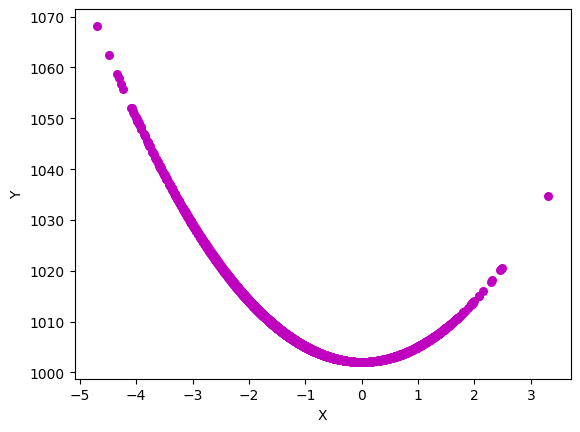

In [132]:
import matplotlib.pyplot as plt


#plotting data points
plt.scatter(X, Y, color = "m", marker = "o", s = 30)


# Plotting the predicted line
x = np.linspace(-5, 5, 50000)   # continuous domain

# Adding labels to the plot
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

### Jax variant

Below is an idential variant of this SGD implementation but leveraging the jax library instead

With this particular variant, some of the custom variables are statically defined. There are other methods to customly insert arguments into the function just like any regular function parameter but for the sake of convenience here, I have statically defined them within the function itself.

By defining these values statically, the jax.jit decorator can be applied to the entire training loop, allowing JAX to compile the loop into a single optimised computation graph. This removes Python-level loop overhead and enables more efficient execution while preserving the same optimisation logic.

In [133]:
import jax
import jax.numpy as jnp 
from jax import lax

def prediction(m, b, x):
    return m * x + b

def mse(m, c, x, y):
    estimate = prediction(m, c, x)
    return jnp.mean((estimate - y) ** 2)

@jax.jit
def train_SGD(X, Y):
    epochs = 10000
    learningRate = 0.01
    seed = 42

    X = jnp.asarray(X)
    Y = jnp.asarray(Y)

    m = jnp.array(0.0)
    b = jnp.array(0.0)

    key = jax.random.PRNGKey(seed)

    n = X.shape[0]


    def SGD_step(carry, _):
        m, b, key = carry

        key, subkey = jax.random.split(key)

        random_index = jax.random.randint(subkey, (), 0, n)

        x = X[random_index]
        y = Y[random_index]

        pred = prediction(m, b, x)

        grad_m = (pred - y) * x
        grad_b = (pred - y)

        m = m - learningRate * grad_m
        b = b - learningRate * grad_b

        return (m, b, key), None
    
    (m, b, key), _ = lax.scan(
        SGD_step,
        (m, b, key),
        None,
        length=epochs
    )

    return m, b


        


In [135]:
key = jax.random.PRNGKey(42)
X = jax.random.normal(key, (10000,))

Y = 3.0 * X + 2.0 + 0.1 * jax.random.normal(key, X.shape)

m, b = train_SGD(X, Y)
print("Learned:", float(m), float(b))



Learned: 3.09999942779541 1.9999990463256836
